# BME 4760 HW 2

## Load packages

In [1]:
import numpy as np
import pandas as pd

## Load CSV data

In [2]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

## Split the dataset into training and testing subsets

In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 'MDVP:Fo(Hz)':'PPE']
y = df.loc[:, 'status']

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

# status labels are already 0 or 1

array([0, 1], dtype=int64)

### Holdout method

In [6]:
from sklearn.model_selection import train_test_split

# First split data into training and testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## KNN Classifcation

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [13]:
# Standardize features by removing the mean and scaling to unit variance
# Implement KNN classification
pipe_knn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier()) 

# k values assigned to be tested
param_range = [4,5,6,7,8,9,10]

param_grid = {'kneighborsclassifier__n_neighbors': param_range};


# tune hyperparameter (k) using grid search
# Apply 10-fold cross-validation to the training data
gs = GridSearchCV(estimator= pipe_knn, param_grid = param_grid, cv = 10, scoring = 'accuracy') 

gs = gs.fit(X_train, y_train)

# find best k value and corresponding accuracy
print(gs.best_score_)
print(gs.best_params_)

0.8974358974358975
{'kneighborsclassifier__n_neighbors': 5}


In [9]:
# use optimal parameter (k = 5) to test on remaining test data
clf = gs.best_estimator_

# create model based on best estimator
clf.fit(X_train, y_train)
print('Test accuracy: %.2f' % clf.score(X_test, y_test))

Test accuracy: 0.92


## Evaluation

### Plot learning curve

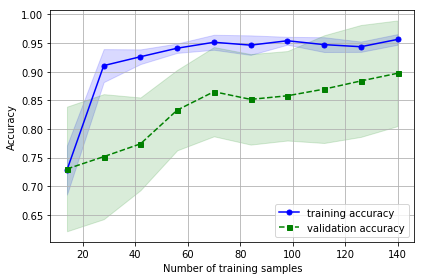

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipeknn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5)) 

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipeknn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### The training and validation accuracy are considerably steep when less than 30-40 samples are used. The learning curve overall indicates high variance in the model because of a notable gap between the training and validation accuracy. The validation accuracy also has much greater variance than the training accuracy. These observations could be attributed to a large amount of features and the need for feature selection, and/or the relatively small amount of samples in the whole dataset.

### Plot validation curve

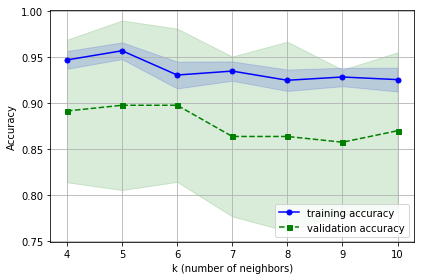

In [14]:
from sklearn.model_selection import validation_curve

pipeknn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier()) 

train_scores, test_scores = validation_curve(
                estimator=pipeknn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

#### The validation curve shows that k = 5 or 6 would yield the greatest accuracy, however, after using grid search k = 5 was output as the best parameter. The discrepancy again could be attributed the large amount of variance in the data and the relatively small number of samples available for training and testing. 